In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
data = sns.load_dataset("tips")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
features = data[['total_bill']]
tip = data['tip']

In [14]:
from sklearn import linear_model

f = linear_model.LinearRegression(fit_intercept=False)
f.fit(features.values, tip)

LinearRegression(fit_intercept=False)

In [15]:
f.predict([[100]])

array([14.37318953])

In [16]:
f.predict([[74.12]])

array([10.65340808])

In [19]:
data['prediction'] = f.predict(features.values)
data

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.172537
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.906633
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.258402
242,17.82,1.75,Male,No,Sat,Dinner,2,2.561302


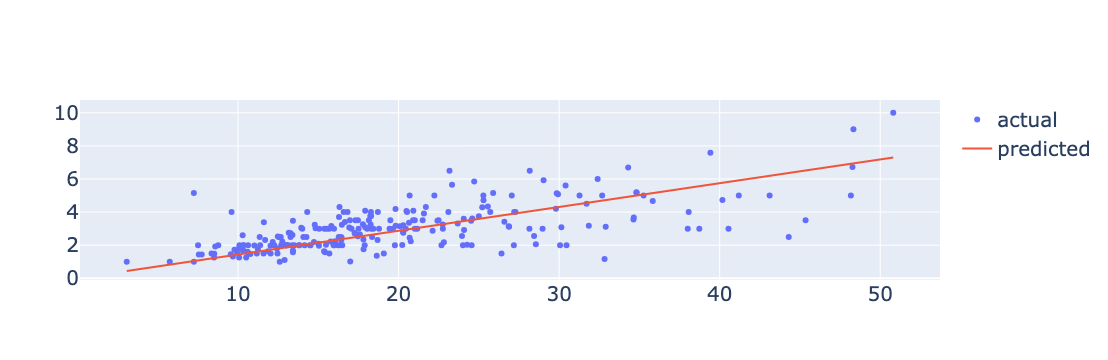

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['tip'], mode='markers', name='actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction'], mode='lines', name='predicted'))
fig.update_layout(font_size=20)

In [22]:
(f.coef_, f.intercept_)

(array([0.1437319]), 0.0)

In [23]:
f_w_int = linear_model.LinearRegression(fit_intercept=True)
f_w_int.fit(features.values, tip)

LinearRegression()

In [26]:
f_w_int.predict([[100], [0]])

array([11.42272135,  0.92026961])

In [27]:
f.predict([[100], [0]])

array([14.37318953,  0.        ])

In [28]:
data['prediction_with_intercept'] = f_w_int.predict(data[['total_bill']].values)

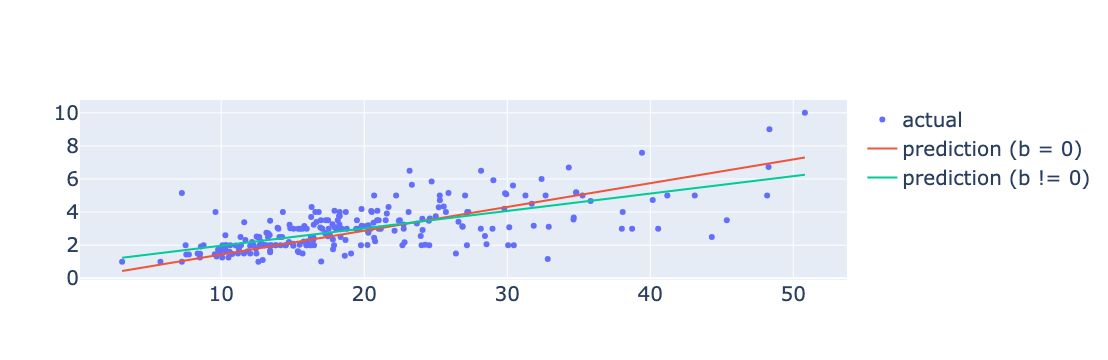

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['tip'], mode='markers', name='actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction'], mode='lines', name='prediction (b = 0)'))
fig.add_trace(go.Scatter(x=data['total_bill'], y=data['prediction_with_intercept'], mode='lines', name='prediction (b != 0)'))
fig.update_layout(font_size=20)

In [31]:
data['l2_loss'] = (data['tip'] - data['prediction']) ** 2
data.head(5)

,total_bill,tip,sex,smoker,day,time,size,prediction,prediction_with_intercept,l2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,2.704636,2.050638
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,2.006223,0.030211
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,3.126835,0.230585
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,3.407250,0.008756
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,3.502822,0.005720


In [33]:
data['l2_loss'].mean()

1.1781161154513173

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(data['tip'], f.predict(data[['total_bill']].values))

1.1781161154513173

In [36]:
mean_squared_error(data['tip'], f_w_int.predict(data[['total_bill']].values))

1.036019442011377

In [45]:
mean_squared_error(data['tip'], data['total_bill'] * 0.11)

1.7133696722540983

In [46]:
def mse_given_theta(theta):
    return mean_squared_error(data['tip'], data['total_bill'] * theta)

In [47]:
mse_given_theta(0.2)

2.667486278688525

In [49]:
thetas = np.linspace(0.1, 0.2, 100)
thetas

array([0.1       , 0.1010101 , 0.1020202 , 0.1030303 , 0.1040404 ,
       0.10505051, 0.10606061, 0.10707071, 0.10808081, 0.10909091,
       0.11010101, 0.11111111, 0.11212121, 0.11313131, 0.11414141,
       0.11515152, 0.11616162, 0.11717172, 0.11818182, 0.11919192,
       0.12020202, 0.12121212, 0.12222222, 0.12323232, 0.12424242,
       0.12525253, 0.12626263, 0.12727273, 0.12828283, 0.12929293,
       0.13030303, 0.13131313, 0.13232323, 0.13333333, 0.13434343,
       0.13535354, 0.13636364, 0.13737374, 0.13838384, 0.13939394,
       0.14040404, 0.14141414, 0.14242424, 0.14343434, 0.14444444,
       0.14545455, 0.14646465, 0.14747475, 0.14848485, 0.14949495,
       0.15050505, 0.15151515, 0.15252525, 0.15353535, 0.15454545,
       0.15555556, 0.15656566, 0.15757576, 0.15858586, 0.15959596,
       0.16060606, 0.16161616, 0.16262626, 0.16363636, 0.16464646,
       0.16565657, 0.16666667, 0.16767677, 0.16868687, 0.16969697,
       0.17070707, 0.17171717, 0.17272727, 0.17373737, 0.17474

In [50]:
mses = [mse_given_theta(theta) for theta in thetas]
mses

[2.0777683729508194,
 2.0366887534058913,
 1.996569059699077,
 1.9574092918303747,
 1.919209449799786,
 1.8819695336073097,
 1.8456895432529465,
 1.8103694787366964,
 1.7760093400585586,
 1.7426091272185338,
 1.7101688402166224,
 1.678688479052823,
 1.6481680437271375,
 1.6186075342395636,
 1.5900069505901033,
 1.5623662927787565,
 1.5356855608055218,
 1.5099647546704,
 1.4852038743733909,
 1.461402919914495,
 1.4385618912937121,
 1.4166807885110417,
 1.3957596115664843,
 1.37579836046004,
 1.3567970351917082,
 1.3387556357614898,
 1.3216741621693837,
 1.3055526144153906,
 1.2903909924995107,
 1.2761892964217436,
 1.262947526182089,
 1.2506656817805475,
 1.2393437632171185,
 1.2289817704918033,
 1.2195797036046003,
 1.2111375625555103,
 1.2036553473445333,
 1.197133057971669,
 1.1915706944369175,
 1.1869682567402793,
 1.1833257448817533,
 1.1806431588613406,
 1.1789204986790405,
 1.1781577643348538,
 1.1783549558287796,
 1.1795120731608182,
 1.18162911633097,
 1.1847060853392344,
 1.18

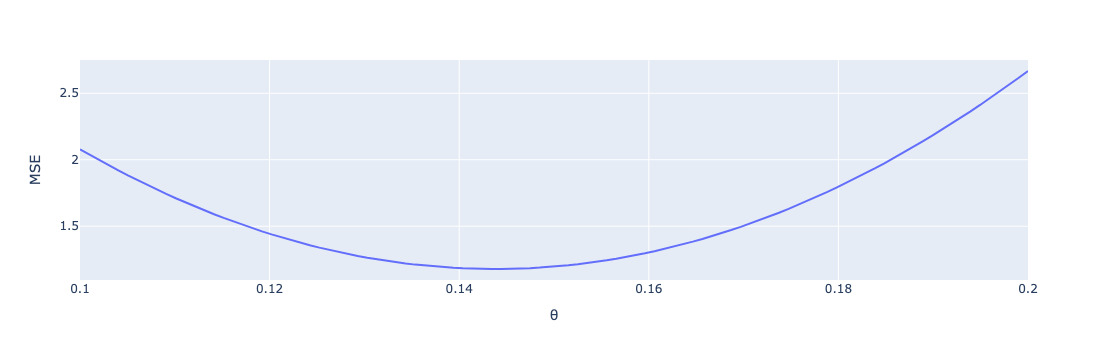

In [53]:
fig = px.line(x=thetas, y=mses)
fig.update_layout(
    xaxis_title='θ',
    yaxis_title='MSE',
)